In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("C://Users//abhir//Downloads//IRIS.csv")

In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df0 = iris[:50]
df1 = iris[50:100]
df2 = iris[100:]

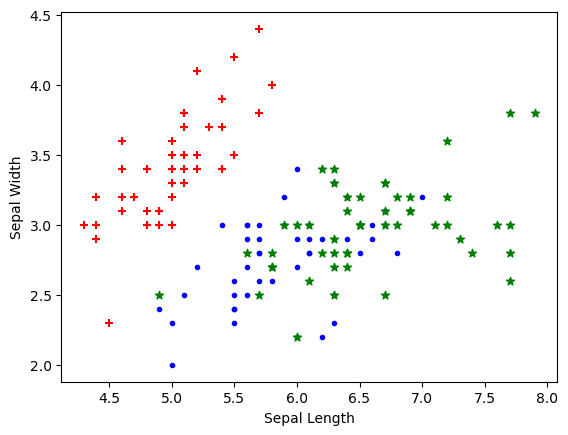

In [8]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal_length'], df0['sepal_width'], color = "red", marker="+")
plt.scatter(df1['sepal_length'], df1['sepal_width'], color = "blue", marker=".")
plt.scatter(df2['sepal_length'], df2['sepal_width'], color = "green", marker="*")

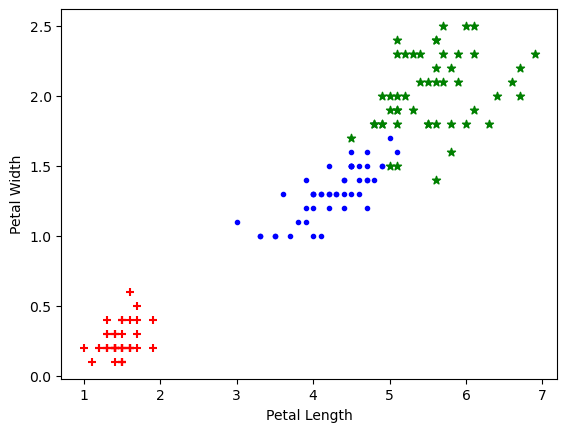

In [9]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['petal_length'], df0['petal_width'], color = "red", marker="+")
plt.scatter(df1['petal_length'], df1['petal_width'], color = "blue", marker=".")
plt.scatter(df2['petal_length'], df2['petal_width'], color = "green", marker="*")

In [10]:
print(iris['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
mappings = {'Iris-setosa':0 , 'Iris-versicolor':1 , 'Iris-virginica':2 }
iris['Classification'] = iris['species'].map(mappings)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['Classification']

In [14]:
x_train, x_test , y_train , y_test = train_test_split(x,y,train_size=.3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
knn.score(x_test, y_test)

C:\Users\abhir\anaconda\anaco\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9809523809523809

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

C:\Users\abhir\anaconda\anaco\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
cm

array([[31,  0,  0],
       [ 0, 35,  0],
       [ 0,  2, 37]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

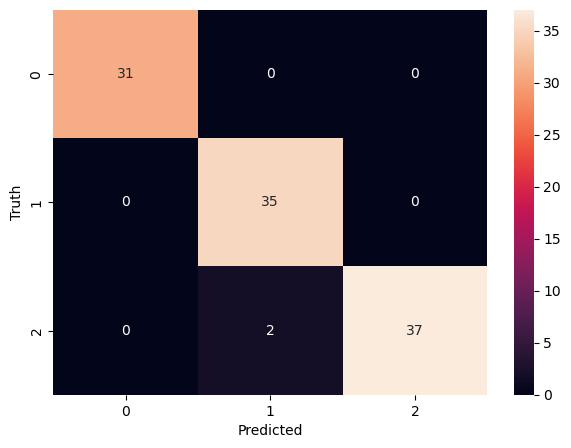

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      1.00      0.97        35
           2       1.00      0.95      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

